In [3]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv("G:\\GitHub\\diggi-teste\\estudo_de_caso_diggi\\dados\\base_teste_ok.csv", sep=';', encoding="utf_8")

In [26]:
data.head()

,Nº do cliente,Safra,Estado,Renda Mensal,Endividamento,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,Performance 30D3M EVER,Performance 60D6M EVER,Performance 60D9M EVER,Performance 90D9M EVER,Performance 90D12M EVER
0,6.325851e+08,2020-05-01 00:00:00 UTC,MS,1076.0,26 a 50%,0.0,2.0,418.0,0.0,0.0,141.0,236.0,196.0,405.0,BOM,MAU,MAU,MAU,MAU
1,1.190978e+09,2020-05-01 00:00:00 UTC,MG,12709.0,Até 25%,0.0,0.0,0.0,0.0,0.0,767.0,646.0,805.0,946.0,BOM,BOM,BOM,BOM,BOM
2,1.089165e+09,2020-06-01 00:00:00 UTC,MS,2518.0,Acima de 100%,0.0,4.0,32306.0,0.0,0.0,67.0,238.0,196.0,563.0,BOM,BOM,BOM,BOM,BOM
3,1.342327e+08,2020-05-01 00:00:00 UTC,RS,1090.0,Até 25%,0.0,0.0,0.0,0.0,0.0,245.0,523.0,290.0,698.0,MAU,BOM,MAU,BOM,MAU
4,1.055186e+09,2020-10-01 00:00:00 UTC,RJ,1155.0,Até 25%,0.0,0.0,0.0,0.0,0.0,697.0,718.0,645.0,816.0,BOM,BOM,NaN,NaN,NaN


In [5]:
arr_cols_flag = ['30D3M','60D6M','60D9M','90D9M','90D12M']

for f in arr_cols_flag:
    col_flag = []
    for i in data['Performance ' + f + ' EVER'].iteritems():
        valor = (i[1])
        if valor == 'BOM':
            col_flag.append(1)
        elif valor == 'MAU':
            col_flag.append(0)
        else:
            col_flag.append(None)

    data[f] = col_flag

In [6]:
flag_divida = []
for i in data['Endividamento'].iteritems():
  valor = (i[1])
  if valor == 'Até 25%':
    flag_divida.append(0.25)
  elif valor == '26 a 50%':
    flag_divida.append(0.5)
  elif valor == '51 a 75%':
    flag_divida.append(0.75)
  elif valor == '76 a 100%':
    flag_divida.append(1)
  elif valor == 'Acima de 100%':
    flag_divida.append(1.5)
  else:
    flag_divida.append(None)

data['% Endividamento'] = flag_divida

In [7]:
# Se o valor da renda mensal for menor ou igual a ??? este será baixo, senão se for menor que ??? será médio, senão será alto.
categorias_renda_mensal = []
# alimentando a lista categorias
for i in data['Renda Mensal'].iteritems():
  valor = (i[1])
  if valor <= 2500:
    categorias_renda_mensal.append('Baixo')
  elif valor < 5000:
    categorias_renda_mensal.append('Medio')
  else:
    categorias_renda_mensal.append('Alto')

data['categorias_renda_mensal'] = categorias_renda_mensal

In [7]:
data.head(5)

,Nº do cliente,Safra,Estado,Renda Mensal,Endividamento,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,...,Performance 60D9M EVER,Performance 90D9M EVER,Performance 90D12M EVER,30D3M,60D6M,60D9M,90D9M,90D12M,% Endividamento,categorias_renda_mensal
0,6.325851e+08,2020-05-01 00:00:00 UTC,MS,1076.0,26 a 50%,0.0,2.0,418.0,0.0,0.0,...,MAU,MAU,MAU,1.0,0.0,0.0,0.0,0.0,0.50,Baixo
1,1.190978e+09,2020-05-01 00:00:00 UTC,MG,12709.0,Até 25%,0.0,0.0,0.0,0.0,0.0,...,BOM,BOM,BOM,1.0,1.0,1.0,1.0,1.0,0.25,Alto
2,1.089165e+09,2020-06-01 00:00:00 UTC,MS,2518.0,Acima de 100%,0.0,4.0,32306.0,0.0,0.0,...,BOM,BOM,BOM,1.0,1.0,1.0,1.0,1.0,1.50,Medio
3,1.342327e+08,2020-05-01 00:00:00 UTC,RS,1090.0,Até 25%,0.0,0.0,0.0,0.0,0.0,...,MAU,BOM,MAU,0.0,1.0,0.0,1.0,0.0,0.25,Baixo
4,1.055186e+09,2020-10-01 00:00:00 UTC,RJ,1155.0,Até 25%,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,0.25,Baixo


In [8]:
data.describe()

,Nº do cliente,Renda Mensal,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,30D3M,60D6M,60D9M,90D9M,90D12M,% Endividamento
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8335.000000,8335.000000,3995.000000,10000.000000
mean,6.101154e+08,2780.155700,0.164900,0.711100,1635.66340,0.152900,209.724300,459.182800,524.183800,483.280100,695.888500,0.875600,0.829000,0.766647,0.812238,0.766458,0.445825
std,3.515864e+08,1464.592111,1.564146,1.823285,10741.23154,1.173908,2700.805532,264.013507,200.494433,215.561897,115.237171,0.330054,0.376528,0.422991,0.390546,0.423137,0.422184
min,1.241258e+06,1041.000000,0.000000,-7.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
25%,3.056783e+08,1404.000000,0.000000,0.000000,0.00000,0.000000,0.000000,216.000000,253.000000,277.000000,630.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
50%,6.101154e+08,3365.000000,0.000000,0.000000,0.00000,0.000000,0.000000,481.000000,627.000000,482.000000,700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
75%,9.145524e+08,3492.000000,0.000000,1.000000,145.00000,0.000000,0.000000,672.250000,669.000000,669.000000,772.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
max,1.218989e+09,33564.000000,64.000000,35.000000,462266.00000,37.000000,133742.000000,999.000000,811.000000,922.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000


In [42]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
data = data[0:10000]

In [10]:
select_columns = ['Renda Mensal',
    'Quantidade de Cheques sem Fundo',
    'Quantidade de Restritivos', 'Valor dos Restritivos',
    'Quantidade de Protestos', 'Valor dos Protestos', 'Modelo Score 1',
    'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4',
    '30D3M','60D6M','60D9M','90D9M','90D12M', '% Endividamento']
data = data.filter(items=select_columns)

In [12]:
# Checando valores nulos
data.isnull().sum()

Renda Mensal                          0
Quantidade de Cheques sem Fundo       0
Quantidade de Restritivos             0
Valor dos Restritivos                 0
Quantidade de Protestos               0
Valor dos Protestos                   0
Modelo Score 1                        0
Modelo Score 2                        0
Modelo Score 3                        0
Modelo Score 4                        0
30D3M                                 0
60D6M                                 0
60D9M                              1665
90D9M                              1665
90D12M                             6646
% Endividamento                       0
dtype: int64

In [18]:
data.head()

,Renda Mensal,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,30D3M,60D6M,60D9M,90D9M,90D12M,% Endividamento
0,1076.0,0.0,2.0,418.0,0.0,0.0,141.0,236.0,196.0,405.0,1.0,0.0,0.0,0.0,0.0,0.50
1,12709.0,0.0,0.0,0.0,0.0,0.0,767.0,646.0,805.0,946.0,1.0,1.0,1.0,1.0,1.0,0.25
2,2518.0,0.0,4.0,32306.0,0.0,0.0,67.0,238.0,196.0,563.0,1.0,1.0,1.0,1.0,1.0,1.50
3,1090.0,0.0,0.0,0.0,0.0,0.0,245.0,523.0,290.0,698.0,0.0,1.0,0.0,1.0,0.0,0.25
4,1155.0,0.0,0.0,0.0,0.0,0.0,697.0,718.0,645.0,816.0,1.0,1.0,NaN,NaN,NaN,0.25


### Árvore de Decisão Regressão

possíveis ajustes  
1 arvore -> p1 
1 arvore -> p2 
 
(p1 + p2) / 2 
 
features 
linhas/exemplos 
 
1000 
amostra com reposição - bootstrap sampling - bagging  
 
bagging 
1 arvore - amostra1 -> p1 
1 arvore - amostra2 -> p2 
 
subspace sampling 
 
10  
 
1 arvore - amostra1 - 2 features -> p1 
1 arvore - amostra2 - 2 features -> p2 

In [11]:
X = data.drop(['30D3M','60D6M','60D9M','90D9M','90D12M'], axis=1)
y = data['30D3M']

Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.5, random_state=0)

tree = RandomForestRegressor(n_estimators=1000, min_samples_leaf=100, random_state=0, n_jobs=-1) 
tree.fit(Xtr, ytr)

p = tree.predict(Xval)

np.sqrt(mean_squared_error(yval, p))

0.3176977385719225

decision tree lvl 3   -> 0.3209063038510057
decision tree msl 610 -> 0.3205826152987339

-------------

default -> 0.32794307432845715 
n_estimators=200 -> 0.32723792567488263 
n_estimators=300, msl=1 -> 0.32700459391948067  
n_estimators=300, msl=2 -> 0.3251200533103327  
 
n_estimators=50, msl=1 -> 0.3292999848162766 
n_estimators=50, msl=2 -> 0.3264629475543712 
 
n_estimators=10, msl=1 -> 0.34094281045360086 
n_estimators=10, msl=2 -> 0.33544759986656014 

n_estimators=1000, msl=1   -> 0.32685764607853374
n_estimators=1000, msl=2   -> 0.325031717835997
n_estimators=1000, msl=5   -> 0.32227158727168714
n_estimators=1000, msl=10  -> 0.32087646833936356
n_estimators=1000, msl=100 -> 0.3176977385719225

#### Visualize a Decision Tree from a Random Forest in plot_tree

AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'

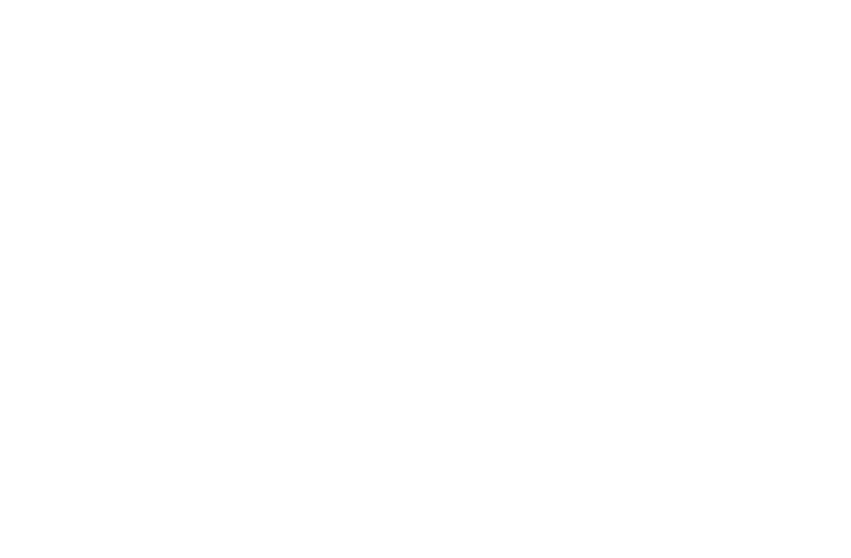

In [32]:
pylab.figure(figsize=(15,10))
plot_tree(tree, feature_names=Xtr.columns)

#### Visualize a Decision Tree from a Random Forest in Python using Scikit-Learn

In [13]:
data_feature_names = ['Renda Mensal',
    'Quantidade de Cheques sem Fundo',
    'Quantidade de Restritivos', 'Valor dos Restritivos',
    'Quantidade de Protestos', 'Valor dos Protestos', 'Modelo Score 1',
    'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4',
    '30D3M','60D6M','60D9M','90D9M','90D12M', '% Endividamento']
data_feature_names_crop = ['Renda Mensal',
    'Quantidade de Cheques sem Fundo',
    'Quantidade de Restritivos', 'Valor dos Restritivos',
    'Quantidade de Protestos', 'Valor dos Protestos', 'Modelo Score 1',
    'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4', '% Endividamento']
data_target_names = array(['30D3M'])

In [12]:
estimator = tree.estimators_[5]

In [39]:
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = data_feature_names_crop,
                class_names = data_target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [49]:
# Convert to png using system command (requires Graphviz)
from subprocess import call

file_dot = "G:\\GitHub\\diggi-teste\\estudo_de_caso_diggi\\analises\\tree.dot"
file_png = "G:\\GitHub\\diggi-teste\\estudo_de_caso_diggi\\analises\\tree.png"
call(['dot', '-Tpng', file_dot, '-o', file_png, '-Gdpi=600'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [41]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

#### Plot decision trees using sklearn.tree.plot_tree() function

In [24]:
import matplotlib.pyplot as plt

[Text(443.9089285714286, 504.7714285714286, 'Modelo Score 2 <= 645.5\nmse = 0.103\nsamples = 3146\nvalue = 0.883'),
 Text(230.175, 427.11428571428576, 'Renda Mensal <= 1719.5\nmse = 0.142\nsamples = 1881\nvalue = 0.829'),
 Text(95.65714285714286, 349.4571428571429, 'Modelo Score 4 <= 645.5\nmse = 0.091\nsamples = 685\nvalue = 0.899'),
 Text(47.82857142857143, 271.8, 'Modelo Score 1 <= 91.5\nmse = 0.066\nsamples = 415\nvalue = 0.929'),
 Text(23.914285714285715, 194.14285714285717, 'mse = 0.098\nsamples = 116\nvalue = 0.89'),
 Text(71.74285714285715, 194.14285714285717, 'Modelo Score 4 <= 573.0\nmse = 0.051\nsamples = 299\nvalue = 0.946'),
 Text(47.82857142857143, 116.48571428571432, 'mse = 0.033\nsamples = 128\nvalue = 0.966'),
 Text(95.65714285714286, 116.48571428571432, 'mse = 0.065\nsamples = 171\nvalue = 0.93'),
 Text(143.4857142857143, 271.8, 'Modelo Score 2 <= 609.5\nmse = 0.128\nsamples = 270\nvalue = 0.85'),
 Text(119.57142857142857, 194.14285714285717, 'mse = 0.157\nsamples = 1

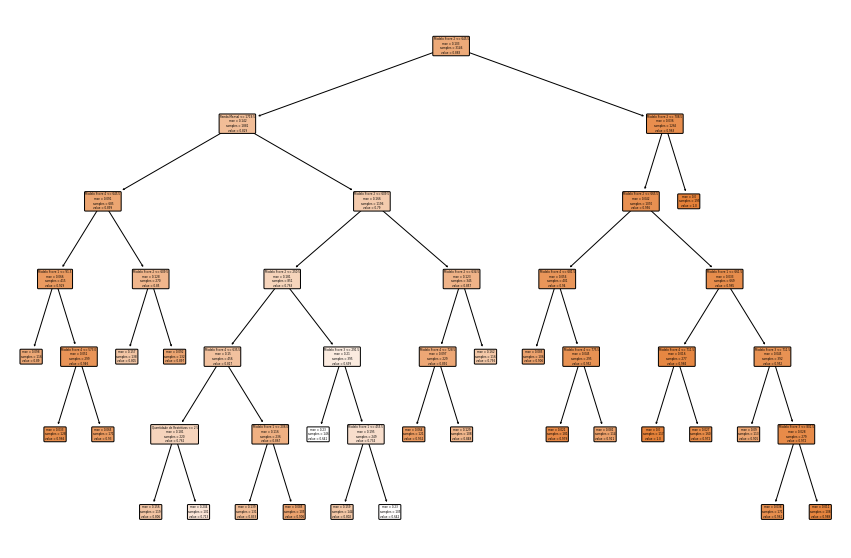

In [25]:
fig = plt.figure(figsize=(15, 10))
plot_tree(tree.estimators_[0], 
          feature_names=data_feature_names,
          class_names=data_target_names, 
          filled=True, impurity=True, 
          rounded=True)

#### Plot decision trees using sklearn.tree.export_graphviz() function

In [ ]:
#!pip install graphviz

In [1]:
import graphviz
from sklearn.tree import export_graphviz

In [21]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [17]:
estimator = tree.estimators_[99]

In [18]:
dot_data = export_graphviz(estimator, 
                           feature_names=data_feature_names_crop,
                           class_names=data_target_names, 
                           filled=True, impurity=True, 
                           rounded=True)

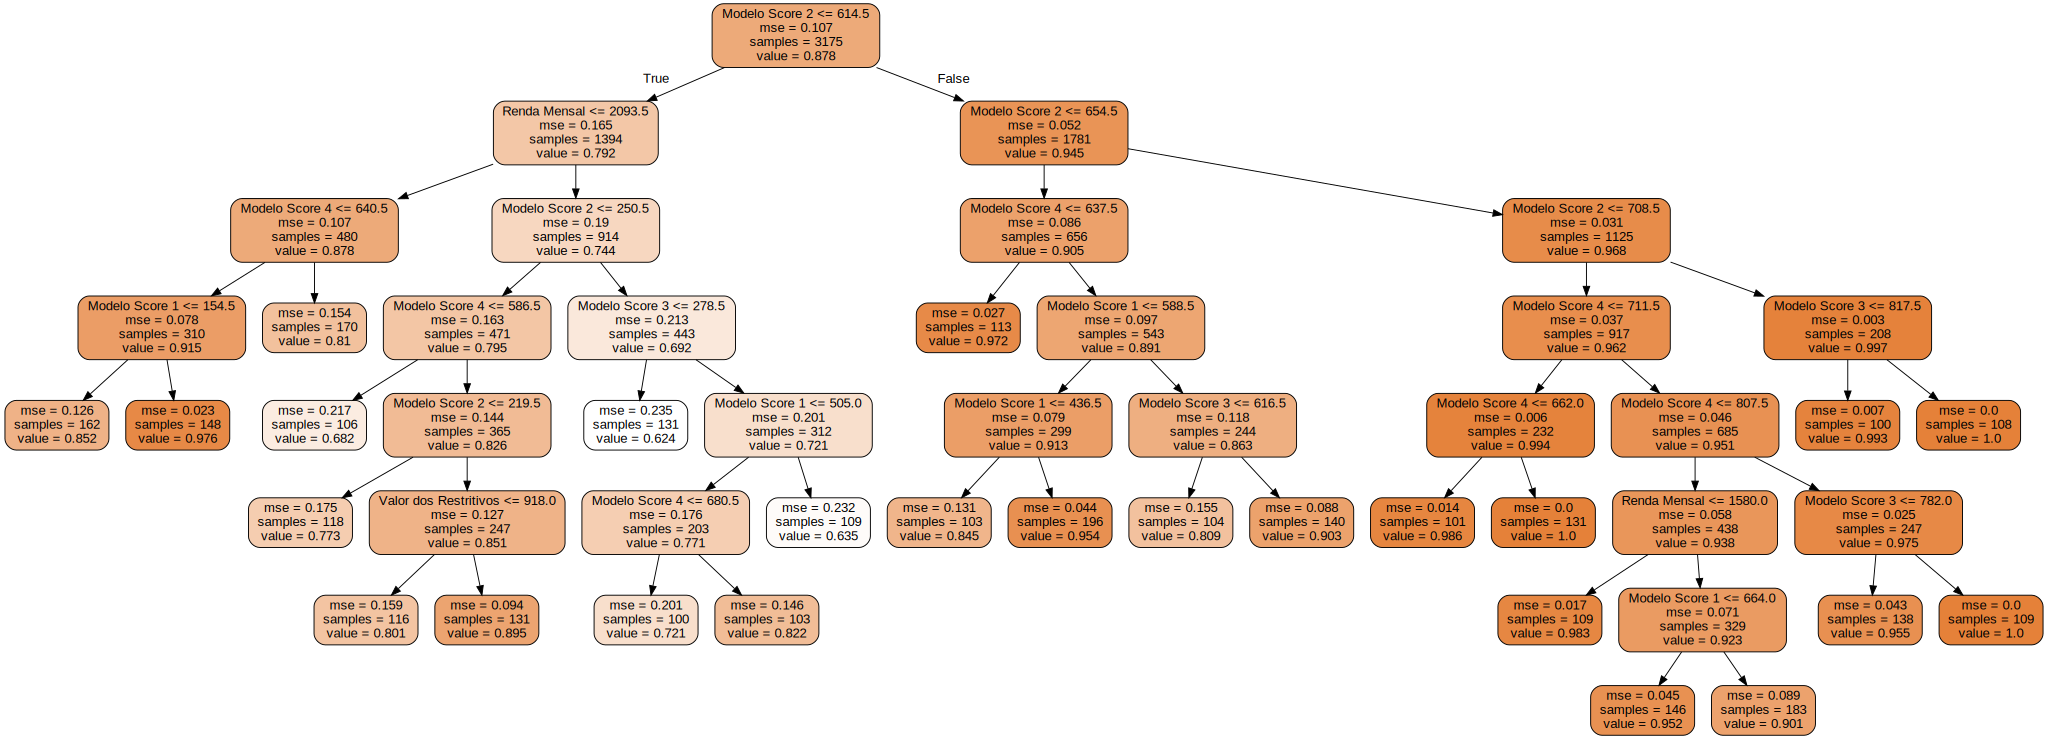

In [22]:
graph = graphviz.Source(dot_data, format='png')
graph

In [23]:
graph.render('random_forest')

'random_forest.png'

#### Plot decision trees using dtreeviz Python package

In [28]:
#!pip install dtreeviz

In [29]:
from dtreeviz.trees import dtreeviz

Dtreeviz — Plot a decision tree on a regression dataset

In [34]:
estimator = tree.estimators_[0]

In [35]:
viz = dtreeviz(estimator, X, y,
               feature_names=data_feature_names,
               title="decision tree - data")

viz.save("decision_tree_regresssion.svg")

In [ ]:
from google.colab import files
files.download("decision_tree_regresssion.svg")

#### Print decision tree details using sklearn.tree.export_text() function

In [36]:
from sklearn.tree import export_text

In [37]:
estimator = tree.estimators_[0]

In [39]:
viz = export_text(estimator, 
                  spacing=3, decimals=3,
                  feature_names=data_feature_names_crop)

In [43]:
print(viz)

|--- Modelo Score 2 <= 645.500
|   |--- Renda Mensal <= 1719.500
|   |   |--- Modelo Score 4 <= 645.500
|   |   |   |--- Modelo Score 1 <= 91.500
|   |   |   |   |--- value: [0.890]
|   |   |   |--- Modelo Score 1 >  91.500
|   |   |   |   |--- Modelo Score 4 <= 573.000
|   |   |   |   |   |--- value: [0.966]
|   |   |   |   |--- Modelo Score 4 >  573.000
|   |   |   |   |   |--- value: [0.930]
|   |   |--- Modelo Score 4 >  645.500
|   |   |   |--- Modelo Score 2 <= 609.500
|   |   |   |   |--- value: [0.805]
|   |   |   |--- Modelo Score 2 >  609.500
|   |   |   |   |--- value: [0.897]
|   |--- Renda Mensal >  1719.500
|   |   |--- Modelo Score 2 <= 609.500
|   |   |   |--- Modelo Score 2 <= 250.500
|   |   |   |   |--- Modelo Score 4 <= 635.500
|   |   |   |   |   |--- Quantidade de Restritivos <= 2.500
|   |   |   |   |   |   |--- value: [0.806]
|   |   |   |   |   |--- Quantidade de Restritivos >  2.500
|   |   |   |   |   |   |--- value: [0.713]
|   |   |   |   |--- Modelo Score 

### Árvore de Decisão Classificação

Dtreeviz — Plot a decision tree on a classification dataset

In [51]:
X = data.drop(['30D3M','60D6M','60D9M','90D9M','90D12M'], axis=1)
y = data['30D3M']

In [52]:
tree_c = RandomForestClassifier(n_estimators=100,
                            max_depth=3,
                            max_features='auto',
                            min_samples_leaf=4,
                            bootstrap=True,
                            n_jobs=-1,
                            random_state=0)
tree_c.fit(X, y)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_jobs=-1,
                       random_state=0)

In [54]:
estimator_c = tree_c.estimators_[99]

In [55]:
viz = dtreeviz(estimator_c, X, y,
               target_name="category",
               feature_names=data_feature_names,
               class_names=list(data_target_names),
               title="decision tree - data")

viz.save("decision_tree_classification.svg")

KeyError: 1

In [ ]:
from google.colab import files
files.download("decision_tree_classification.svg")